## Introduction

We'll focus more directly on customizing colors, line widths, layout, and annotations to improve the ability for a viewer to extract insights from the charts.

__Data:__ We'll continue to use the same data set containing the percentage of bachelor's degrees granted to women from 1970 to 2012.
- __Source:__ Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available <a href="http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv">here</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

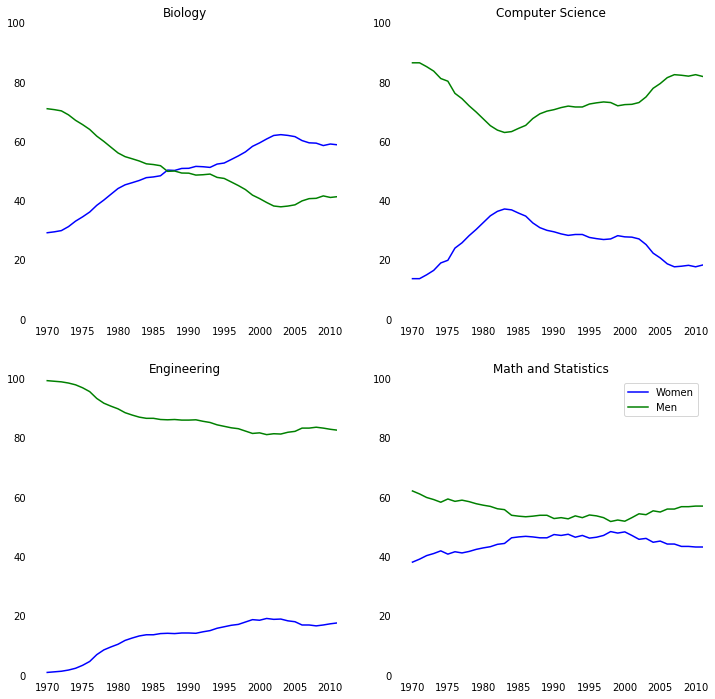

In [2]:
women_degrees = pd.read_csv('data/percent-bachelors-degrees-women-usa.csv')
major_cats = ['Biology', 'Computer Science', 'Engineering','Math and Statistics']

fig = plt.figure(figsize=(12,12))

for sp in range(0, 4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100 - women_degrees[major_cats[sp]], c='green', label='Men')
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
plt.legend(loc="upper right")
plt.show()

### Color

When selecting colors, we need to be mindful of people who have some amount of color blindness. People who have color blindness have a decreased ability to distinguish between certain kinds of colors.
- The most common form of color blindness is red-green color blindness, where the person can't distinguish between red and green shades.

Thankfully, there are color palettes we can use that are friendly for people with color blindness. One of them is called __Color Blind 10__ and was released by Tableau, the company that makes the data visualization platform of the same name.

### Setting Line Color Using RGB

The Color Blind 10 palette contains ten colors that are colorblind friendly. Let's use the first two colors in the palette for the line colors in our charts. Next to each color strip are three integer values, separated by periods (`.`):
<img src="_images/tableau_rgb_values.png" />

These numbers represent the __RGB values__ for each color. The RGB color model describes how the three primary colors (red, green, and blue) can be combined in different proportions to form any secondary color.

The first color in the palette is a color that resembles dark blue and has the following RGB values:
- Red: 0
- Green: 107
- Blue: 164

To specify a line color using RGB values, we pass in a tuple of the values to the `c` parameter when we generate the line chart. Matplotlib expects each value to be scaled down and to range between 0 and 1 (not 0 and 255).

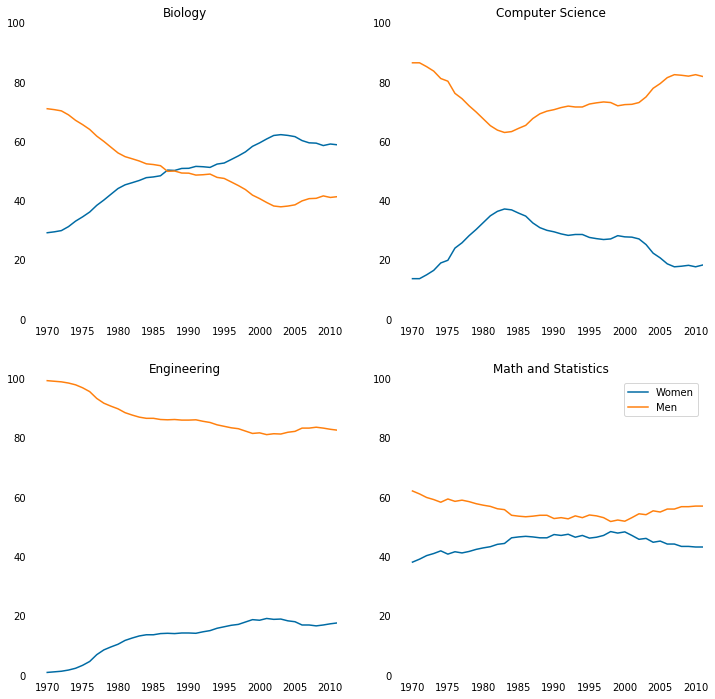

In [3]:
fig = plt.figure(figsize=(12,12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # The color for each line is added here
    dk_blue = (0/255, 107/255, 164/255)
    orange = (255/255, 128/255, 14/255)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=dk_blue, label='Women')
    ax.plot(women_degrees['Year'], 100 - women_degrees[major_cats[sp]], c=orange, label='Men')
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)

plt.legend(loc="upper right")
plt.show()

### Setting Line Width

By default, the actual lines reflecting the underlying data in the line charts we've been generating are quite thin. The white color in the blank area in the line charts is still a dominating color. To emphasize the lines in the plots, we can increase the width of each line. Increasing the line width also improves the data-ink ratio a little bit, because more of the chart area is used to showcase the data.

When we call the `Axes.plot()` method, we can use the `linewidth` parameter to specify the line width. Matplotlib expects a float value for this parameter:
```
ax.plot(women_degrees['Year'], women_degrees['Biology'], label='Women', c=cb_dark_blue, linewidth=2)
```
The higher the line width, the thicker each line will be.

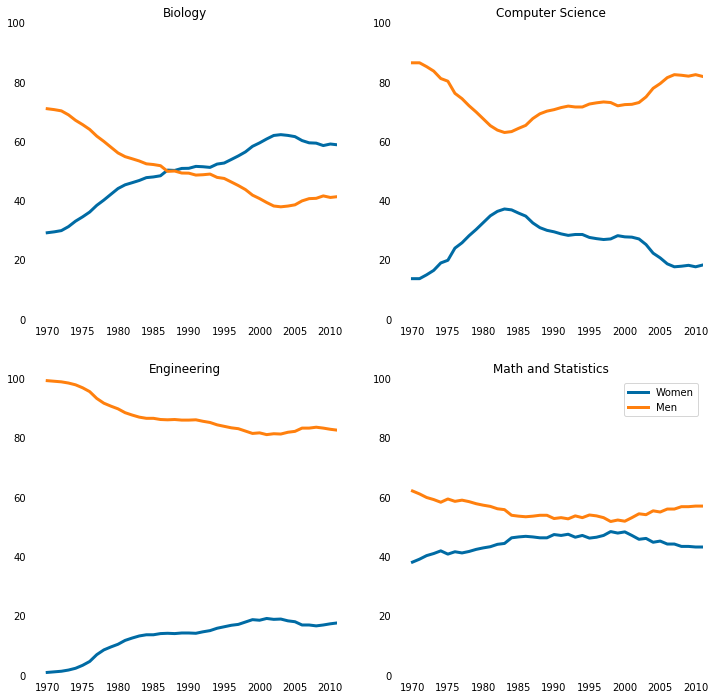

In [4]:
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(12,12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # Set the line width when specifying how each line should look
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100 - women_degrees[major_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)

plt.legend(loc="upper right")
plt.show()

### Improve the Layout and Ordering

So far, we've been generating our line charts on a 2 by 2 subplot grid. If we wanted to visualize all six STEM degrees, we'd need to either add a new column or a new row. Unfortunately, neither solution orders the plots in a beneficial way to the viewer. By scanning horizontally or vertically, a viewer isn't able to learn any new information and this can cause some frustration as the viewer's gaze jumps around the image.

To make the viewing experience more coherent, we can:
- use layout of a single row with multiple columns
- order the plots in decreasing order of initial gender gap

Here's what that would look like:
<img src="_images/line_charts_dec_initial_gg.png"/>

The leftmost plot has the largest gender gap in 1968 while the rightmost plot has the smallest gender gap in 1968. If we're instead interested in the recent gender gaps in STEM degrees, we can order the plots from largest to smallest ending gender gaps. Here's what that would look like:
<img src="_images/line_charts_dec_ending_gg.png"/>